In [1]:
import requests
import json
import xmltodict
import pandas as pd
import datetime

r = requests.get("https://data.channelcoast.org/observations/waves/latest?key=6cefd36d8e12a4dead4cf06d4dbd09c0&sensor=Perranporth&duration=96")
decoded = r.content.decode('utf-8')
response_json = json.loads(json.dumps(xmltodict.parse(decoded)))

hold = response_json['wfs:FeatureCollection']['gml:featureMember']
waves_hs = []
waves_time = []
waves_te = []
for nn in range(0,len(hold),1):
    row_nn = hold[nn]
    hs = float(row_nn['ms:waves']['ms:hs']) #Wave height
    te = float(row_nn['ms:waves']['ms:te']) #Energy period
    time = row_nn['ms:waves']['ms:date']
    waves_hs.append(hs)
    waves_time.append(time)
    waves_te.append(te)


datestamp = pd.to_datetime(waves_time, format='%Y%m%d#%H%M%S')

No handles with labels found to put in legend.


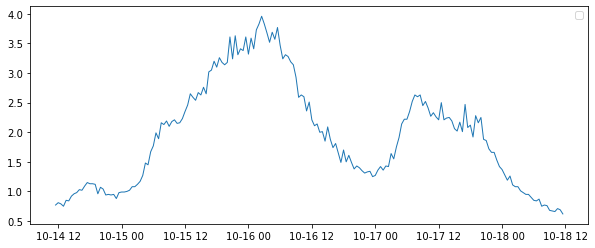

In [2]:
from matplotlib.ticker import AutoMinorLocator
import matplotlib.pyplot as plt


fig, axs = plt.subplots(sharex=True)
axs.plot(datestamp,waves_hs, linewidth = 1)
axs.legend()
fig.set_size_inches(10,4)

No handles with labels found to put in legend.


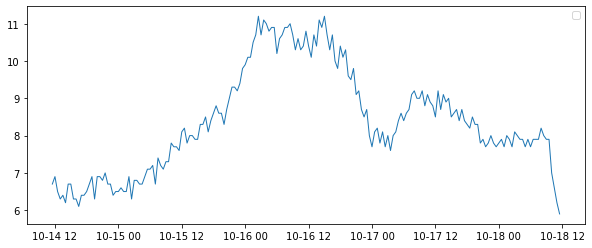

In [3]:
fig, axs = plt.subplots(sharex=True)
axs.plot(datestamp, waves_te, linewidth = 1)
axs.legend()
fig.set_size_inches(10,4)

## Tides

In [4]:


r = requests.get("https://data.channelcoast.org/observations/tides/20210123130000?key=6cefd36d8e12a4dead4cf06d4dbd09c0&sensor=102&duration=24")
decoded = r.content.decode('utf-8')
response_json = json.loads(json.dumps(xmltodict.parse(decoded)))

hold = response_json['wfs:FeatureCollection']['gml:featureMember']
tides_level = []
tides_time = []
for nn in range(0,len(hold),1):
    row_nn = hold[nn]
    level = float(row_nn['ms:tide']['ms:value']) #Wave height
    time = row_nn['ms:tide']['ms:date']
    tides_level.append(level)
    tides_time.append(time)

datestamp = pd.to_datetime(tides_time, format='%Y%m%d#%H%M%S')

No handles with labels found to put in legend.


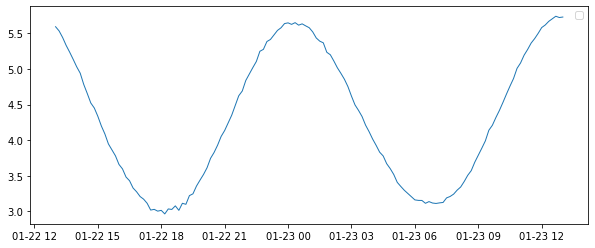

In [5]:

fig, axs = plt.subplots(sharex=True)
axs.plot(datestamp,tides_level, linewidth = 1)
axs.legend()
fig.set_size_inches(10,4)

In [ ]:
## Create a bot that says how long it is until high or low tide

In [6]:



r = requests.get("https://data.channelcoast.org/observations/tides/latest?key=6cefd36d8e12a4dead4cf06d4dbd09c0&sensor=102&duration=24")
decoded = r.content.decode('utf-8')
response_json = json.loads(json.dumps(xmltodict.parse(decoded)))

hold = response_json['wfs:FeatureCollection']['gml:featureMember']
tides_level = []
tides_time = []


for nn in range(0,len(hold),1):
    row_nn = hold[nn]

    level = float(row_nn['ms:tide']['ms:value']) #Wave height
    time = row_nn['ms:tide']['ms:date']

    level_hw = float(row_nn['ms:tide']['ms:hw'])
    time_hw = row_nn['ms:tide']['ms:hw_timestamp']

    level_low = float(row_nn['ms:tide']['ms:lw'])
    time_lw = row_nn['ms:tide']['ms:lw_timestamp']

    tides_level.append(level)
    tides_time.append(time)

datestamp = pd.to_datetime(tides_time, format='%Y%m%d#%H%M%S')

In [66]:
print(time_lw,time_hw)

20221007#093200 20221007#031100


In [7]:
datestamp_lw = pd.to_datetime(time_lw, format='%Y%m%d#%H%M%S')
datestamp_hw = pd.to_datetime(time_hw, format='%Y%m%d#%H%M%S')

In [8]:
from datetime import datetime
dateTimeObj = datetime.now()

In [10]:
import numpy as np
min_dur = min(datestamp_lw - dateTimeObj,datestamp_hw - dateTimeObj)

if min_dur == datestamp_lw - dateTimeObj:
    next_level = "low tide"
    duration_text = next_level + " in approx " + str(round((datestamp_lw - dateTimeObj)/np.timedelta64(1, 'h'))) + " hours"
elif min_dur == datestamp_hw - dateTimeObj:
    next_level = "high tide"
    duration_text = next_level + " in approx " + str(round((datestamp_hw - dateTimeObj)/np.timedelta64(1, 'h'))) + " hours"

print(duration_text)

low tide in approx 3 hours


In [70]:
## Time until high low
## Level relative to spring/neap. "it's a neap tide at the mo", "we're between neap and spring"


## Be specific on water level
## Its 3 hours until XX water level, 

Timedelta('0 days 03:20:40.773371')

In [ ]:
## Recontstruct a synthetic spectrum from the wave stats
